In [2]:
import cv2
import tensorflow as tf
from mtcnn.mtcnn import MTCNN
import numpy as np
import os
import tensorflow as tf
import pickle

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    #tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4500)])
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)

In [3]:
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)    
    return img

class FaceDetector:
    
    
    def __init__(self):
        self.BBOX_VERT_ENLARG = 1.5#1.0
        self.BBOX_HORI_ENLARG = 1#1.5
        
        cascade_file_1 = "D:\\Violence Dataset\\Gender recognition\\Pycharm lab\\venv\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_alt2.xml"
        cascade_file_2 = "D:\\Violence Dataset\\Gender recognition\\Pycharm lab\\venv\Lib\\site-packages\\cv2\\data\\haarcascade_profileface.xml"
        cascade_file_3 = "D:\\Violence Dataset\\Gender recognition\\Pycharm lab\\venv\\Lib\\site-packages\\cv2\\data\\lbpcascade_frontalface_improved.xml"
        cascade_file_4 = "D:\\Violence Dataset\\Gender recognition\\Pycharm lab\\venv\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml"
        cascade_file_5 = "D:\\Violence Dataset\\Gender recognition\\Pycharm lab\\venv\\Lib\\site-packages\\cv2\\data\\lbpcascade_profileface.xml"
        cascade_file_6 = "D:\\Violence Dataset\\Gender recognition\\Pycharm lab\\venv\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_alt_tree.xml"
        cascade_file_7 = "D:\\Violence Dataset\\Gender recognition\\Pycharm lab\\venv\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_alt2.xml"
        cascade_file_8 = "D:\\Violence Dataset\\Gender recognition\\Pycharm lab\\venv\\Lib\\site-packages\\cv2\\data\\haarcascade_upperbody.xml"
        
        self._faceCascades = [
                              #cv2.CascadeClassifier(cascade_file_1), 
                              #cv2.CascadeClassifier(cascade_file_2),
#                               cv2.CascadeClassifier(cascade_file_3), 
#                               cv2.CascadeClassifier(cascade_file_4), 
#                               cv2.CascadeClassifier(cascade_file_5), 
#                               cv2.CascadeClassifier(cascade_file_6), 
#                               cv2.CascadeClassifier(cascade_file_7),
                              
                             ]
        self._bodyCascades = [
                                cv2.CascadeClassifier(cascade_file_8),
                            ]
        self._mtcnn = MTCNN()
        
    def detect(self, img):
        #imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        self._faces = []
        self._bodies = []
#         self._detect_cascades(img, imgGray)
#        self._detect_body_cascades(img, imgGray)
        self._detect_mtcnn(img)
        return self._faces
                
    def _detect_cascades(self, img, gray):
        for faceCascade in self._faceCascades:
            faces = faceCascade.detectMultiScale(gray,1.1,5)

            for bbox in faces:
                e_bbox = self._enlarge_bbox(bbox, img.shape)
                self._faces.append(e_bbox)
                
                #cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    def _detect_body_cascades(self, img, gray):
        for bodyCascade in self._bodyCascades:
            bodies = bodyCascade.detectMultiScale(gray,1.1,5)

            for bbox in bodies:
                self._bodies.append(bbox)
                
    def _detect_mtcnn(self,img):
        faces = self._mtcnn.detect_faces(img)
        for face in faces:
            e_bbox = self._enlarge_bbox(face['box'], img.shape)
            confidence = face['confidence']
            if confidence > 0.80:
                self._faces.append(e_bbox)
            #(x, y, w, h) = face['box']
            #cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)\
            
    def _enlarge_bbox(self, bbox, img_shape):
        bbox_max_dx = img_shape[0]
        bbox_max_dy = img_shape[1]
        x = bbox[0]
        y = bbox[1]
        dx = bbox[2]
        dy = bbox[3]
        e_dx = min(int(dx*(self.BBOX_HORI_ENLARG+1)),bbox_max_dx)
        e_dy = min(int(dy*(self.BBOX_VERT_ENLARG+1)), bbox_max_dy)
        e_x = max(int(x-(e_dx-dx)/2),0)
        e_y = max(int(y-(e_dy-dy)/2),0)
        return (e_x,e_y,e_dx,e_dy)

In [5]:
import cv2

class Webcam:

    def __init__(self):
        self.cap = cv2.VideoCapture(0)
        self.cap.set(3, 640)
        self.cap.set(4, 480)

    def read_feed(self):
        suc, img = self.cap.read()
        if not suc:
            raise
        return img

def load_caffe_model():
    return cv2.dnn.readNetFromCaffe('deploy_gender.prototxt', 'gender_net.caffemodel')

In [25]:
output_folder = '..\\..\Output\\'
video = '060_GLO_FIC_PSI'
accpected_frame_format = ['jpg']
vid = Video(video, output_folder+video+'\\')
vid.read_frames()

In [6]:
images = []
cap = cv2.VideoCapture("D:\\Violence Dataset\\Positivos\\019_YOU_FIC_FIS_PSI.mp4")
ret, img = cap.read()
i = 0
while ret and i<300:
    res = cv2.resize(img, (800,600))
    images.append(res)
    ret, img = cap.read()
    i += 1

In [8]:
model = tf.keras.models.load_model('cnn_inceptionv3_pretrainned_gender_recognition_v3')

In [8]:
cv2.imshow("frame",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
model.predict(np.expand_dims(face_col[0]/255,0))

NameError: name 'model' is not defined

In [1]:
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [13]:
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
gender_list = ['Female', 'Male']
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
face_detector = FaceDetector()

# cap = cv2.VideoCapture("D:\\Violence Dataset\\Positivos\\010_YOU_FIC_FIS_PSI.mp4")
# ret, image = cap.read()
# image = cv2.resize(image, (800,600))
for image in images:
    image_cpoy = image.copy()
    faces = face_detector.detect(image)
    for (x, y, w, h ) in faces:
        face_img = image_cpoy[y:y+h,x:x+w].copy()
        face_img = cv2.resize(face_img, (178, 218))/255
        face_img = np.expand_dims(face_img, 0)
#         gender_preds = model(face_img)
        gender_probs = model.predict_proba(face_img)
        precision = max(gender_probs[0])
        overlay_text = '?'
        cv2.rectangle(image_cpoy, (x, y), (x+w, y+h), (255, 255, 0), 2)
#         if precision > 0.7:
        gender = gender_list[np.argmax(gender_probs)]
        overlay_text = "%s %3.3f" % (gender, precision)
            
        cv2.putText(image_cpoy, overlay_text, (x, y+int(h*0.1)), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
    for (x, y, w, h ) in face_detector._bodies:
        cv2.rectangle(image_cpoy, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.imshow("Result", image_cpoy)
    cv2.waitKey(1)
#     ret, image = cap.read()
#     image = cv2.resize(image, (800,600))
cv2.destroyAllWindows()

In [53]:
face = face_col[1]
blob = cv2.dnn.blobFromImage(face, 1, (178, 218), MODEL_MEAN_VALUES, swapRB=True)

In [ ]:
face = face_col[1]
exp_face  = np.expand_dims(face, 0)


In [15]:
for face in face_col:
    cv2.imshow("Result", face)
    cv2.waitKey(200)
cv2.destroyAllWindows()

In [47]:
face = face_col[1]
blob = cv2.dnn.blobFromImage(face, 1, (178, 218), MODEL_MEAN_VALUES, swapRB=False)

img = tf.keras.preprocessing.image.array_to_img(face_img)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.convert_image_dtype(img, tf.float32)
model.predict(img)


ValueError: Attempt to convert a value (<PIL.Image.Image image mode=RGB size=178x218 at 0x176A7AE7BE0>) with an unsupported type (<class 'PIL.Image.Image'>) to a Tensor.

In [20]:
face = face_col[0]
face_img = cv2.resize(face, (178, 218))
face_img = np.expand_dims(face_img, 0)
#face_img = tf.convert_to_tensor(face)
model.predict(face_img)
cv2.imshow("Result", face)
cv2.waitKey(0)
cv2.destroyAllWindows()

'Female'

In [7]:
split = '060_GLO_FIC_PSI.-12'
output_folder = '...\Output\\'
model = tf.keras.Sequential()
model.load('cnn_inceptionv3_pretrainned_gender_recognition_v1')
#web = Webcam()
#cap = cv2.VideoCapture("D:\\Violence Dataset\\Negativos\\008_GLO_FIC_NEG.mp4")
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
gender_list = ['Male', 'Female']
gender_net = load_caffe_model()
font = cv2.FONT_HERSHEY_COMPLEX_SMALL

face_detector = FaceDetector()

#splits = [f for f in vid._split_frames.keys()]
#splits = sorted(splits, key=lambda x: int(x.split('-')[-1]))
#for split in splits[:]:
    #for image in vid._split_frames[split][::]:
    #while True:
        #img = web.read_feed()

    # detect faces in the image
for image in images[500::3]:
    faces = face_detector.detect(image)
    for (x, y, w, h ) in faces:
        
        face_img = image[y:y+h, h:h+w].copy()
        blob = cv2.dnn.blobFromImage(face_img, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        precision = max(gender_preds[0])
        overlay_text = '?'
        if precision > 0.95:
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)
            gender = gender_list[gender_preds[0].argmax()]
            overlay_text = "%s %4.3f" % (gender, precision)
            print(overlay_text)
        cv2.putText(image, overlay_text, (x, y), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imshow("Result", image)
    cv2.waitKey(1)
cv2.destroyAllWindows()

Male 0.999
Male 0.999
Male 0.999
Male 0.998
Male 0.957
Male 1.000
Male 0.999
Male 0.999
Female 0.982
Female 0.981
Female 0.994
Male 0.998
Male 0.996
Female 0.955
Female 0.977
Male 0.985
Male 0.996
Male 0.999
Male 0.997
Male 0.996
Male 0.997
Male 0.998
Male 0.994
Male 0.997
Male 0.998
Male 0.997
Male 0.992
Male 0.976
Male 0.950
Male 0.986
Male 0.987
Female 0.986
Male 0.995
Female 0.991
Female 0.985
Male 1.000
Male 1.000
Male 1.000
Male 1.000
Male 0.999
Male 0.992
Male 0.997
Male 0.996
Female 0.986
Male 1.000
Male 0.987
Female 0.995
Female 0.999
Female 0.985
Male 0.993
Female 0.998
Female 0.995
Female 0.998
Female 0.997
Female 0.993
Female 0.998
Male 0.992
Male 0.996
Male 0.997
Male 0.997
Male 0.980
Male 0.999
Male 0.998
Male 0.999
Male 0.999
Male 0.998
Male 0.997
Male 0.998
Male 0.998
Male 0.983
Male 0.998
Male 0.992
Male 0.997
Female 0.980
Female 0.999
Female 0.998
Female 0.988
Female 0.998
Male 0.982
Male 0.994
Male 0.952
Male 0.951
Male 0.961
Male 0.978
Male 0.962
Male 0.952
Male 0.9

KeyboardInterrupt: 

In [7]:
split = '060_GLO_FIC_PSI.-12'
output_folder = '...\Output\\'
model = tf.keras.Sequential()
model.load('cnn_inceptionv3_pretrainned_gender_recognition_v1')
#web = Webcam()
#cap = cv2.VideoCapture("D:\\Violence Dataset\\Negativos\\008_GLO_FIC_NEG.mp4")
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
gender_list = ['Male', 'Female']
gender_net = load_caffe_model()
font = cv2.FONT_HERSHEY_COMPLEX_SMALL

face_detector = FaceDetector()

#splits = [f for f in vid._split_frames.keys()]
#splits = sorted(splits, key=lambda x: int(x.split('-')[-1]))
#for split in splits[:]:
    #for image in vid._split_frames[split][::]:
    #while True:
        #img = web.read_feed()

    # detect faces in the image
for image in images[500::3]:
    faces = face_detector.detect(image)
    for (x, y, w, h ) in faces:
        
        face_img = image[y:y+h, h:h+w].copy()
        blob = cv2.dnn.blobFromImage(face_img, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        precision = max(gender_preds[0])
        overlay_text = '?'
        if precision > 0.95:
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)
            gender = gender_list[gender_preds[0].argmax()]
            overlay_text = "%s %4.3f" % (gender, precision)
            print(overlay_text)
        cv2.putText(image, overlay_text, (x, y), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imshow("Result", image)
    cv2.waitKey(1)
cv2.destroyAllWindows()

Male 0.999
Male 0.999
Male 0.999
Male 0.998
Male 0.957
Male 1.000
Male 0.999
Male 0.999
Female 0.982
Female 0.981
Female 0.994
Male 0.998
Male 0.996
Female 0.955
Female 0.977
Male 0.985
Male 0.996
Male 0.999
Male 0.997
Male 0.996
Male 0.997
Male 0.998
Male 0.994
Male 0.997
Male 0.998
Male 0.997
Male 0.992
Male 0.976
Male 0.950
Male 0.986
Male 0.987
Female 0.986
Male 0.995
Female 0.991
Female 0.985
Male 1.000
Male 1.000
Male 1.000
Male 1.000
Male 0.999
Male 0.992
Male 0.997
Male 0.996
Female 0.986
Male 1.000
Male 0.987
Female 0.995
Female 0.999
Female 0.985
Male 0.993
Female 0.998
Female 0.995
Female 0.998
Female 0.997
Female 0.993
Female 0.998
Male 0.992
Male 0.996
Male 0.997
Male 0.997
Male 0.980
Male 0.999
Male 0.998
Male 0.999
Male 0.999
Male 0.998
Male 0.997
Male 0.998
Male 0.998
Male 0.983
Male 0.998
Male 0.992
Male 0.997
Female 0.980
Female 0.999
Female 0.998
Female 0.988
Female 0.998
Male 0.982
Male 0.994
Male 0.952
Male 0.951
Male 0.961
Male 0.978
Male 0.962
Male 0.952
Male 0.9

KeyboardInterrupt: 

In [117]:
images = []
for split in splits[7:]:
    for image in vid._split_frames[split][::]:
        images.append(image)
        

height, width, layers = images[0].shape
size = (width,height)
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(images)):
    out.write(images[i])
out.release()

In [37]:
y

124.5

In [87]:
sorted([f.split('-')[-1] for f in vid._split_frames.keys()])

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [67]:
l

In [32]:
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
gender_list = ['Female', 'Male']

def load_caffe_model():
    return cv2.dnn.readNetFromCaffe('deploy_gender.prototxt', 'gender_net.caffemodel')


SyntaxError: invalid syntax (<ipython-input-32-ee47abba5959>, line 7)

In [4]:
def mkdir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [5]:
class Video:
    
    def __init__(self, video_name, video_folder_path):
        self._name = video_name
        self._folder_path = video_folder_path
        self._split_frames = {}
        self._diff_frames = {}
        self._threshold_frames = {}
        self._contours = {}
        self._motion_regions = {}
        self._motion_masks = {}
        self._optical_flows = {}
        self._mask_frames = {}
        self._next_frames = {}
        self._diff_folder = "\\diff\\"
        self._threshold_folder = "\\threshold\\"
        self._mask_folder = "\\mask\\"
        self._prev_frames_folder = "\\prev_frames\\"
        self._next_frames_folder = "\\next_frames\\"
        self._of_folder = "\\optical_flow\\"
    
    def read_frames(self, read_diff=False, read_threshold=False, read_mask=False, read_next_frame=False):
        rv = ReadVideos()
        rv.read_video(self, read_diff=read_diff, read_threshold=read_threshold, read_mask=read_mask, read_next_frame=read_next_frame)
            
    
    def preprocess_difference_and_threshold(self):
        '''
            Preprocessa os frames armazenados em self._split_frames, retornando a coleção de 
            diferenças(grayscale), threashold.
        '''
        for key, split in self._split_frames.items():
            (diff_frames, threshold_frames) = FrameOperations.process_difference_and_threashold(split)
            
            diff_frames = [f[1] for f in diff_frames]
            self._diff_frames[key] = diff_frames
            diff_folder = self._folder_path + key + self._diff_folder
            
            self._threshold_frames[key] = threshold_frames
            threshold_folder = self._folder_path + key + self._threshold_folder
    
    def preprocess_contours(self):
        for key, threshold_split in self._threshold_frames.items():
            self._contours[key] = FrameOperations.process_convex_contours(threshold_split)
            
    def preprocess_motion_regions(self):
        self._motion_regions = {}
        for key, split_frames in self._split_frames.items():
            contours = self._contours[key]
            self._motion_regions[key], self._motion_masks[key] = FrameOperations.process_motion_regions(split_frames, contours)
            
    def preprocess_optical_flow(self):
        self._optical_flows = {}
        lk = OpticalFlow()
        for key, split_frames in self._split_frames.items():
            self._optical_flows[key] = lk.calculate_optical_flow(self._split_frames[key], vid._motion_masks[key])
            
    def preprocess_dense_optical_flow(self):
        self._optical_flows = {}
        lk = OpticalFlow()
        for key, split_frames in self._split_frames.items():
            self._optical_flows[key] = lk.calculate_dense_optical_flow(self._split_frames[key])

    def preprocess_compact_dense_optical_flow(self):
        self._optical_flows = {}
        lk = OpticalFlow()
        for key, split_frames in self._split_frames.items():
            self._optical_flows[key] = lk.calculate_compact_dense_optical_flow(self._split_frames[key])
            
        
    def save_all_preprocessed_frames(self):
        for key, split in self._split_frames.items():
            
            diff_folder = self._folder_path + key + self._diff_folder
            threshold_folder = self._folder_path + key + self._threshold_folder
            mask_folder = self._folder_path + key + self._mask_folder
            #prev_frames_folder = self._folder_path + key + self._prev_frames_folder DEPRECATED
            #next_frames_folder = self._folder_path + key + self._next_frames_folder DEPRECATED
            
            if len(self._split_frames) > 0:
                diff_frames = [f[1] for f in self._diff_frames[key]]
                self.save_frames_in_folder(diff_frames, diff_folder)
                
            if len(self.self._threshold_frames) > 0:
                self.save_frames_in_folder(self._threshold_frames[key], threshold_folder)
            
            if len(self._mask_frames) > 0:
                self.save_frames_in_folder(self._mask_frames[key], mask_folder)
                
            #self.save_frames_in_folder(prev_frames, prev_frames_folder) DEPRECATED
            #self.save_frames_in_folder(self._next_frames, next_frames_folder) DEPRECATED
            
    def save_optical_flows(self, prefix = ''):
        for key, split in self._split_frames.items():
            of_folder = self._folder_path + key + self._of_folder
            utils.mkdir(of_folder)
            of = self._optical_flows[key]
            np.save(of_folder + prefix + 'optical_flow_array',np.array(of))
            
    def save_optical_flows_images(self, prefix = ''):
        for key, split in self._split_frames.items():
            of_folder = self._folder_path + key + self._of_folder
            utils.mkdir(of_folder)
            ofs = self._optical_flows[key]
            count = 0
            for of in ofs:
                cv2.imwrite(of_folder + prefix + "interval-" + str(count) + ".jpg", of)
                count+=1
            
    def save_split_arrays(self):
        of = OpticalFlow()
        for key, split in self._split_frames.items():
            sp_folder = self._folder_path + key
            resampled_array = of._resample_input(split)
            np.save(sp_folder + 'split_array',np.array(resampled_array))
            
    def save_frames_in_folder(self, frames, folder_path, erase_prev_files=True):
        utils.mkdir(folder_path)
        if erase_prev_files:
            utils.erase_files(folder_path)
        count = 0
        for frame in frames:
            cv2.imwrite(folder_path + "frame" + str(count) + ".jpg", frame)
            count += 1
            
    def play_frames(self, show_original=True, show_diff=False, show_threshold=True, show_mask=False, show_next_frame=False):
        for key, split in self._split_frames.items():
            FrameOperations.play_video_split(self, key, show_diff=show_diff, show_threshold=show_threshold, 
                                             show_mask=show_mask, show_next_frame=show_next_frame)
         
            
class utils:
    
    @staticmethod
    def mkdir(path):
        if not os.path.exists(path):
            os.makedirs(path)

    @staticmethod
    def erase_files(folder_path):
        files = [f for f in os.listdir(folder_path) if os.path.isfile(folder_path + f)]
        for file in files:
            file_path = folder_path + file
            os.remove(file_path)
            
class ReadVideos:
    ### TODO : Classe acoplada com a classe video, há dependência cíclica. read_videos não deve saber da existência da classe video.    
    
    def read_video(self, video, read_diff=False, read_threshold=False, read_mask=False, read_next_frame=False):
        split_folders = [f for f in os.listdir(video._folder_path) if os.path.isdir(video._folder_path + f)]
        split_frame_collection = {}
        diffs_collection = {}
        threshold_collection = {}
        masks_collection = {}
        next_collection = {}
        for split_folder in split_folders:
            split_folder_path = video._folder_path + split_folder + "\\"
            split_frame_collection[split_folder] = self._read_folder_frames(split_folder_path)
            
            if read_diff:
                diff_folder = split_folder_path + video._diff_folder
                diffs = self._read_folder_frames(diff_folder)
                diffs_collection[split_folder] = diffs

            if read_threshold:
                threshold_folder = split_folder_path + video._threshold_folder
                threshs = self._read_folder_frames(threshold_folder)
                threshold_collection[split_folder] = threshs

            if read_mask:
                mask_folder = split_folder_path + video._mask_folder
                masks = self._read_folder_frames(mask_folder)
                masks_collection[split_folder] = masks

            if read_next_frame:
                next_frames_folder = split_folder_path + video._next_frames_folder
                next_frames = self._read_folder_frames(next_frames_folder)
                next_collection[split_folder] = next_frames            
            
        video._split_frames = split_frame_collection
        
        if read_diff:
            video._diff_frames = diffs_collection
        
        if read_threshold:
            video._threshold_frames = threshold_collection
        
        if read_mask:
            video._mask_frames = masks_collection
            
        if read_next_frame:
            video._next_frames = next_collection
        
    def _read_folder_frames(self, folder_path):
        frames = []
        files = [f for f in os.listdir(folder_path) if (os.path.isfile(folder_path + f) and f.split('.')[-1] in accpected_frame_format)]
        files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
        for file in files:
            file_path = folder_path + file
            img = cv2.imread(file_path,1)
            frames.append(img)
        return frames
        
        
class FrameOperations:
    
    @staticmethod
    def preprocessing(frames):
        for i in range(1,len(frames)):
            prev_frame_colored = frames[i-1].copy()
            next_frame_colored = frames[i].copy()
            
            prev_frame_gray = cv2.cvtColor(prev_frame_colored, cv2.COLOR_BGR2GRAY)
            next_frame_gray = cv2.cvtColor(next_frame_colored, cv2.COLOR_BGR2GRAY)
            
            (similarity_rate, difference_frame) = ssim(prev_frame_gray, next_frame_gray, full=True)
            
            diff_img = (difference_frame * 255).astype("uint8")
            threshold = cv2.threshold(diff_img, motion_threshold, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            contours, hierarchy = cv2.findContours(threshold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            mask = np.zeros(prev_frame_colored.shape, dtype='uint8')
            
            for c in contours:
                area = cv2.contourArea(c)
                x,y,w,h = cv2.boundingRect(c)
                #if w > minimum_contour_area_width & h > minimum_contour_area_height:
                prev_frame_colored = cv2.rectangle(prev_frame_colored, (x, y), (x + w, y + h), (36,255,12), 2)
                mask = cv2.drawContours(mask, [c], 0, (0,255,0), -1)
                next_frame_colored = cv2.drawContours(next_frame_colored, [c], 0, (0,255,0), -1)

            FrameOperations().show_img('frame', next_frame_colored)
            
    
    @staticmethod
    def process_difference_and_threashold(frames):
        diff_frames = []
        threshold_frames = []
        for i in range(1,len(frames)):
            prev_frame_colored = frames[i-1].copy()
            next_frame_colored = frames[i].copy()
            
            prev_frame_gray = cv2.cvtColor(prev_frame_colored, cv2.COLOR_BGR2GRAY)
            next_frame_gray = cv2.cvtColor(next_frame_colored, cv2.COLOR_BGR2GRAY)
            
            (similarity_rate, difference_frame) = ssim(prev_frame_gray, next_frame_gray, full=True)
            
            diff_img = (difference_frame * 255).astype("uint8")
            threshold = cv2.threshold(diff_img, motion_threshold, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            
            
            diff_frames.append((similarity_rate, diff_img))
            threshold_frames.append(threshold)
        return (diff_frames, threshold_frames)
    
    @staticmethod
    def process_convex_contours(threshold_frames):
        contour_collection = []
        for frame in threshold_frames:
            contours, hierarchy = cv2.findContours(frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            filtered_contours = []
            for contour in contours:
                area = cv2.contourArea(contour)
                is_convex = cv2.isContourConvex(contour)
                w,h = cv2.minAreaRect(contour)[1]
                if int(w) >= minimum_contour_area_width & int(h) >= minimum_contour_area_height:
                    hull = cv2.convexHull(contour)
                    filtered_contours.append(hull)
            contour_collection.append(filtered_contours)
        return contour_collection
    
    @staticmethod
    def process_motion_regions(split_frames, contours_collection):
        motion_regions = []
        motion_masks = []
        for i in range(len(split_frames)-1):
            mask = np.zeros(split_frames[i].shape,np.uint8)
            for contour in contours_collection[i]:
                cv2.drawContours(mask,[contour],-1,(0,255,0),-1)
            pixelpoints = np.transpose(np.nonzero(mask))
            mask_gsc = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
            motion_masks.append(mask_gsc)
            motion_regions.append(pixelpoints)
        return motion_regions, motion_masks
        
    @staticmethod
    def extract_motion_regions(split_frames, motion_masks):
        filtered_images = []
        for i in range(len(split_frames)-1):
            motion_mask = motion_masks[i]
            motion_mask_gsc = cv2.cvtColor(motion_mask, cv2.COLOR_BGR2GRAY)
            motion_mask_binary = (motion_mask_gsc!=0).astype('uint8')
            img = split_frames[i]
            img_gsc = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            result = np.multiply(motion_mask_binary, img_gsc)
            FrameOperations.show_img('frame', result)           
    
    @staticmethod
    def play_video_split(video, split, show_diff=True, show_threshold=True, show_mask=True, show_next_frame=True):
        
        current_frames = video._split_frames[split]
        
        if show_diff:
            diff_frames = video._diff_frames[split]
            
        if show_threshold:
            thresold_frames = video._threshold_frames[split]
            
        if show_mask:
            mask_frames = video._motion_masks[split]
            
        if show_next_frame: 
            next_frames = video._next_frames[split]
        
        for i in range(len(current_frames)-1):
            cv2.imshow('frame',current_frames[i])
            if show_diff:
                cv2.imshow('diff',diff_frames[i])
            if show_threshold:
                cv2.imshow('threshold',thresold_frames[i])
            if show_mask:
                cv2.imshow('mask',mask_frames[i])
            if show_next_frame:
                cv2.imshow('next',next_frames[i])
            
            
            k = cv2.waitKey(0)
            if k == 27:         # wait for ESC key to exit
                break
        cv2.destroyAllWindows()
        
    @staticmethod
    def show_img(window_title, frame):
        while True:
            cv2.imshow(window_title,frame)
            k = cv2.waitKey(0)
            if k == 27:         # wait for ESC key to exit
                break
        cv2.destroyAllWindows()
        
    @staticmethod
    def play_folder(folder_path):
        imgs_name = [f for f in os.listdir(folder_path) if f.split('.')[-1] in accpected_frame_format]
        imgs_name.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
        cv2.namedWindow(folder_path, cv2.WINDOW_NORMAL);
        cv2.setWindowProperty(folder_path, cv2.WND_PROP_AUTOSIZE, cv2.WINDOW_AUTOSIZE)
        for img_name in imgs_name:
            img_path = folder_path + img_name
            img = cv2.imread(img_path)
            cv2.imshow(folder_path,img)
            k = cv2.waitKey(100)
            if k == 27:         # wait for ESC key to exit
                break
        k = cv2.waitKey()
        cv2.destroyAllWindows()
        

In [6]:

model = tf.keras.models.load_model('cnn_vgg16_pretrainned_gender_recognition_v1')

In [20]:
face_detector = FaceDetector()
face_folder = '..\\..\\Face_recog\\'
class_folder = 'Faces\\'
man_folder = 'Man\\'
woman_folder = 'Woman\\'
videos_folder = 'Videos\\'
gender_list = ['Female', 'Male']
font = cv2.FONT_HERSHEY_COMPLEX_SMALL

i=19

videos = [v for v in os.listdir(face_folder)]
#videos_gender_occurance = {}
for video in videos:
    if video not in processed:
        videos_gender_occurance[video] = []
        male_occurance = []
        female_occurance = []
        splits = [s for s in os.listdir(face_folder + video + '\\')]
        print(video)
        for split in splits[::3]:
            files = [f for f in os.listdir(face_folder + video + '\\' + split + '\\')]
            files.sort(key = lambda x:  int(x.split('.')[0].replace('frame','')) )
            for file in files:
                file_path = face_folder + video + '\\' + split + '\\' + file
                img = cv2.imread(file_path, 1)
                img_copy = img.copy()
                faces = face_detector.detect(img)
                count = 0
                max_prob_male = 0.0
                max_prob_female = 0.0

                for (x, y, w, h ) in faces:
                    face_crop = img_copy[y:y+h,x:x+w].copy()
                    face_img = face_crop.copy()
                    face_img = cv2.resize(face_img, (178, 218))/255
                    face_img = np.expand_dims(face_img, 0)
                    gender_probs = model.predict_proba(face_img)
                    precision = max(gender_probs[0])
                    overlay_text = '?'
                    #cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 0), 2)
                    cv2.rectangle(face_crop, (0, 0), (w, h), (255, 255, 0), 2)
                    if precision > 0.8:
                        gender = gender_list[np.argmax(gender_probs)]
                        overlay_text = "%s %3.3f" % (gender, precision)
                        mkdir(class_folder + videos_folder)
                        mkdir(class_folder + videos_folder + video)
                        mkdir(class_folder + videos_folder + video + '\\' + man_folder)
                        mkdir(class_folder + videos_folder + video + '\\' + woman_folder)
                        mkdir(class_folder + man_folder)
                        mkdir(class_folder + woman_folder)

                        if gender == 'Female':
                            save_face_path = class_folder +  woman_folder + split + file.replace('.jpg','') + str(count) + '.jpg'
                            save_video_path = class_folder + videos_folder + video + '\\' + woman_folder + '\\' + split + file.replace('.jpg','') + str(count) + '.jpg'
                            if precision > max_prob_female:
                                max_prob_female = precision
                        else: 
                            save_face_path = class_folder + man_folder + split + file.replace('.jpg','') + str(count) + '.jpg'
                            save_video_path = class_folder + videos_folder + video + '\\' + man_folder  + '\\' + split + file.replace('.jpg','') + str(count) + '.jpg'
                            if precision > max_prob_male:
                                max_prob_male = precision
                        cv2.putText(face_crop, overlay_text, (10, 10+int(h*0.1)), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
                        cv2.imwrite(save_face_path, face_crop)
                        cv2.imwrite(save_video_path, face_crop)
                    count += 1
                male_occurance.append(max_prob_male)
                female_occurance.append(max_prob_female)
        videos_gender_occurance[video].append([male_occurance,female_occurance])
    with open('data.p', 'wb') as fp:
        pickle.dump(videos_gender_occurance, fp, protocol=pickle.HIGHEST_PROTOCOL)

                #cv2.putText(img_copy, overlay_text, (x, y+int(h*0.1)), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
                
            #cv2.imshow("Result", img_copy)
            #cv2.waitKey(1)
        #cv2.destroyAllWindows()

035_YOU_FIC_FIS_PSI
036_YOU_FIC_FIS_PSI
039_YOU_FIC_FIS_PSI_PAT
040_YOU_FIC_NEG
041_YOU_FIC_FIS_PSI
042_YOU_FIC_FIS_PSI
043_GLO_FIC_FIS_PIS
044_GLO_FIC_SEX


In [18]:
processed = [
    '004_YOU_REA_FIS_PSI',
    '007_YOU_FIC_FIS_PSI',
    '008_YOU_FIC_FIS_PSI',
    '009_YOU_FIC_FIS_PSI',
    '010_YOU_FIC_FIS_PSI',
    '011_YOU_FIC_FIS_PSI',
    '013_YOU_FIC_FIS_PSI',
    '014_YOU_FIC_FIS_PSI',
    '015_YOU_FIC_FIS_PSI',
    '016_YOU_FIC_FIS_PSI',
    '017_YOU_FIC_FIS_PSI',
    '019_GLO_FIC_NEG',
    '019_YOU_FIC_FIS_PSI',
    '020_GLO_FIC_NEG',
    '020_YOU_FIC_FIS_PSI',
    '021_YOU_FIC_FIS_PSI_PAT',
    '022_YOU_FIC_FIS_PSI',
    '024_YOU_FIC_FIS_SEX',
    '025_YOU_FIC_FIS_PSI',
    '026_YOU_FIC_FIS_SEX',
    '027_YOU_FIC_FIS_PSI_SEX',
    '028_YOU_FIC_FIS_PSI',
    '029_YOU_FIC_FIS_PSI',
    '032_YOU_FIC_FIS_PSI',
    '034_YOU_FIC_FIS_PSI',
    
    
]

In [22]:
with open('data.p', 'wb') as fp:
    pickle.dump(videos_gender_occurance, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
with open('data.p', 'rb') as fp:
    data = pickle.load(fp)

In [4]:
len(data.keys())

33

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

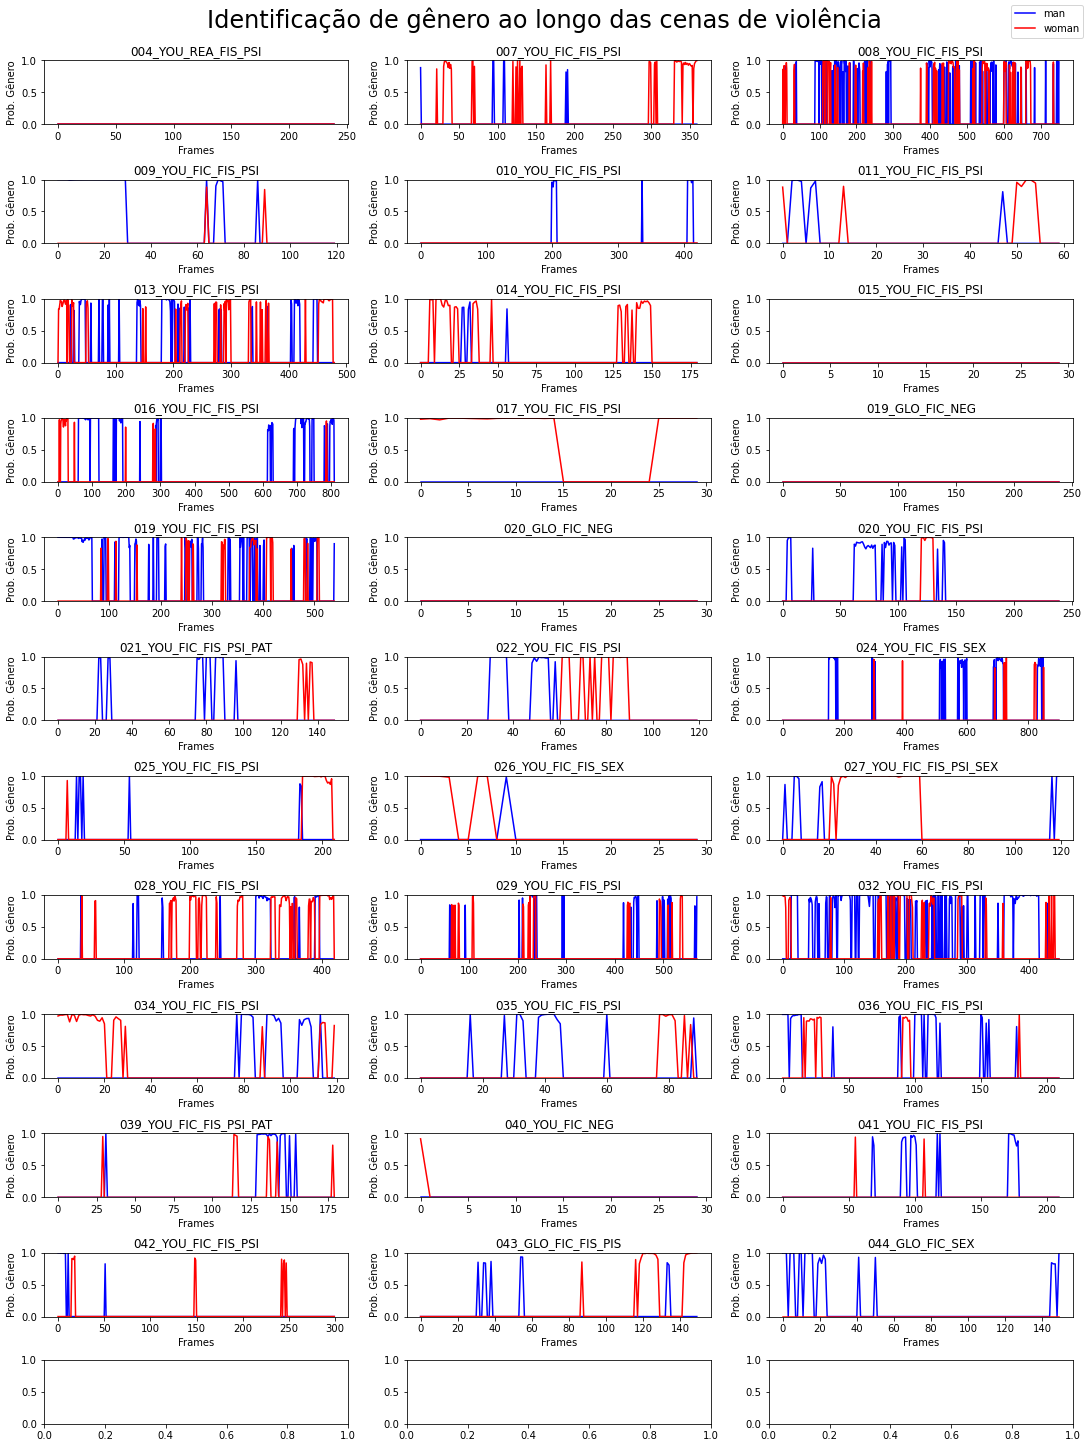

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


quantity = len(data.items())
plots_per_line = 3
lines = quantity//plots_per_line + 1
fig, ax = plt.subplots(lines, plots_per_line, figsize=(15,20), constrained_layout=True)
fig.suptitle('Identificação de gênero ao longo das cenas de violência', fontsize=24)

c_line = 0
c_column = 0
c = 1
for key, item in data.items():         
    male_timeline = item[0][0]
    female_timeline = item[0][1]
    ax[c_line, c_column].set_ylim((0,1))
    ax[c_line, c_column].set_xlabel('Frames')
    ax[c_line, c_column].set_ylabel('Prob. Gênero')
    ax[c_line, c_column].set_title(key)
    
    sns.lineplot(x=range(len(male_timeline)), y=male_timeline, ax=ax[c_line, c_column], color='blue', label='man', legend=None)
    sns.lineplot(x=range(len(female_timeline)), y=female_timeline, ax=ax[c_line, c_column], color='red', label='woman', legend=None)
    c += 1 
    if c == len(data.keys()):
        handles, labels = ax[c_line, c_column].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right')
        
    if c_column + 1 < plots_per_line:
        c_column += 1
    else:
        c_column = 0
        c_line += 1
    


In [26]:
fig.savefig('identificacao_de_genero')
    

Text(45, 55, 'Limiar de gênero')

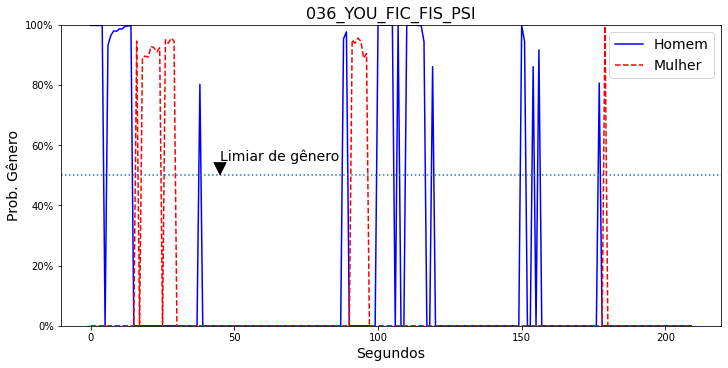

In [12]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
key = '036_YOU_FIC_FIS_PSI'
item = data[key]
male_timeline = [f*100 for f in item[0][0]]
female_timeline = [f*100 for f in item[0][1]]
ax.set_ylim((0,100))
ax.set_xlabel('Segundos', fontsize=14)
ax.set_ylabel('Prob. Gênero', fontsize=14)
ax.set_title(key, fontsize=16)
sns.lineplot(x=range(len(male_timeline)), y=male_timeline, ax=ax, color='blue', label='Homem', legend=None)
sns.lineplot(x=range(len(female_timeline)), y=female_timeline, ax=ax, color='red', label='Mulher', legend=None)
ax.lines[1].set_linestyle("--")
ax.legend(fontsize = 14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.axhline(50,xmax=200 )
ax.lines[2].set_linestyle(":")
ax.annotate('Limiar de gênero', xy=(45, 50), xytext=(45, 55), fontsize=14, arrowprops=dict(facecolor='black', shrink=0.05))

In [13]:
fig.savefig('ex-mec-ident-genero')